# Data Processing for OffMyChest, Relationship Advice and AmITheAsshole datasets

In [120]:
#Mount drive containing dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [121]:
#Import datasets. Change name to dataset of choice
import shutil

shutil.copy('/content/drive/My Drive/OffMyChest_comments.csv', '/content/')
shutil.copy('/content/drive/My Drive/OffMyChest_posts.csv', '/content/')
shutil.copy('/content/drive/My Drive/Colab Notebooks/lexicon.json', '/content/')

'/content/lexicon.json'

In [122]:
import pandas as pd
pd.options.display.max_columns = None
import numpy as np
import json
import re
import nltk
nltk.download('stopwords')
import math
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
import ast
import collections
import time
import datetime as dt
from matplotlib import pyplot as plt
import matplotlib.dates as mdates

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [123]:
#Read data 
comms = pd.read_csv('/content/OffMyChest_comments.csv', lineterminator= '\n')
data = pd.read_csv('OffMyChest_posts.csv',lineterminator= '\n' )
data.rename(columns= {'commentmap\r' : 'commentmap'}, inplace= True)


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1,2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (13,15,19,20,21,23,30,31,32,33,34,36,43,45,46,47,48,56,57,58,59,61,63,65,67,68,70,81,84) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [124]:
#Load the index values of comments from comments.csv file for each post
data['comment_indices'] = None

for i in range(data.shape[0]):
  print("{}/{}".format(i, data.shape[0]))
  url1 = data['url'][i]
  indxs = [key for key, val in enumerate(comms['url']) if val == url1]
  data['comment_indices'][i] = indxs



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Streaming output truncated to the last 5000 lines.
5159/10158
5160/10158
5161/10158
5162/10158
5163/10158
5164/10158
5165/10158
5166/10158
5167/10158
5168/10158
5169/10158
5170/10158
5171/10158
5172/10158
5173/10158
5174/10158
5175/10158
5176/10158
5177/10158
5178/10158
5179/10158
5180/10158
5181/10158
5182/10158
5183/10158
5184/10158
5185/10158
5186/10158
5187/10158
5188/10158
5189/10158
5190/10158
5191/10158
5192/10158
5193/10158
5194/10158
5195/10158
5196/10158
5197/10158
5198/10158
5199/10158
5200/10158
5201/10158
5202/10158
5203/10158
5204/10158
5205/10158
5206/10158
5207/10158
5208/10158
5209/10158
5210/10158
5211/10158
5212/10158
5213/10158
5214/10158
5215/10158
5216/10158
5217/10158
5218/10158
5219/10158
5220/10158
5221/10158
5222/10158
5223/10158
5224/10158
5225/10158
5226/10158
5227/10158
5228/10158
5229/10158
5230/10158
5231/10158
5232/10158
5233/10158
5234/10158
5235/10158
5236/10158
5237/10158
5238/10158
5239/10158
5240/10158
5241/10158
5242/10158
5243/10158
5244/10158
524

In [0]:
#save the csv file
data.to_csv('saved_omc.csv')

In [126]:
data.head()

,all_awardings,allow_live_comments,approved_at_utc,author,author_cakeday,author_created_utc,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_text_color,author_flair_type,author_fullname,author_id,author_patreon_flair,author_premium,awarders,banned_at_utc,banned_by,brand_safe,can_mod_post,contest_mode,created_utc,distinguished,domain,edited,full_link,gilded,gildings,id,is_crosspostable,is_meta,is_original_content,is_reddit_media_domain,is_robot_indexable,is_self,is_video,link_flair_background_color,link_flair_css_class,link_flair_richtext,link_flair_text,link_flair_text_color,link_flair_type,locked,media,media_embed,media_only,mod_reports,no_follow,num_comments,num_crossposts,og_description,og_title,over_18,parent_whitelist_status,permalink,pinned,post_hint,preview,previous_visits,pwls,removed_by_category,retrieved_on,rte_mode,score,secure_media_embed,selftext,send_replies,spoiler,steward_reports,stickied,subreddit,subreddit_id,subreddit_subscribers,subreddit_type,suggested_sort,thumbnail,thumbnail_height,thumbnail_width,title,total_awards_received,treatment_tags,updated_utc,url,user_reports,view_count,whitelist_status,wls,commentmap,comment_indices
0,NaN,NaN,NaN,secaedelcielo,NaN,1.249947e+09,NaN,NaN,[],NaN,NaN,text,t2_3kzqt,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,False,1285651806,NaN,self.offmychest,NaN,https://www.reddit.com/r/offmychest/comments/d...,0.0,NaN,djuld,True,NaN,NaN,False,NaN,True,False,NaN,NaN,[],NaN,dark,text,False,NaN,{},NaN,NaN,False,12,0.0,NaN,NaN,True,house_only,/r/offmychest/comments/djuld/holy_sht_im_sick_...,NaN,NaN,NaN,NaN,NaN,NaN,1.522958e+09,markdown,27,{},Fuck everyone who leads me on to think they're...,True,False,NaN,False,offmychest,t5_2ranw,NaN,public,NaN,self,NaN,NaN,Holy sh*t I'm sick of being a gay man [languag...,NaN,NaN,NaN,https://www.reddit.com/r/offmychest/comments/d...,NaN,NaN,house_only,NaN,"[Comment(id='c10romg'), Comment(id='c10sh6p'),...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]"
1,NaN,NaN,NaN,Poison1990,NaN,1.221310e+09,NaN,NaN,[],NaN,NaN,text,t2_38qix,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,False,1284413791,NaN,self.offmychest,NaN,https://www.reddit.com/r/offmychest/comments/d...,0.0,NaN,dddv0,True,NaN,NaN,False,NaN,True,False,NaN,NaN,[],NaN,dark,text,False,NaN,{},NaN,NaN,False,7,0.0,NaN,NaN,False,house_only,/r/offmychest/comments/dddv0/my_pathetic_lonel...,NaN,NaN,NaN,NaN,NaN,NaN,1.522953e+09,markdown,26,{},I wish attractive females would want to hug me...,True,False,NaN,False,offmychest,t5_2ranw,NaN,public,NaN,self,NaN,NaN,my pathetic lonely man urges,NaN,NaN,NaN,https://www.reddit.com/r/offmychest/comments/d...,NaN,NaN,house_only,NaN,"[Comment(id='c0zdeqj'), Comment(id='c0zfygs'),...","[11, 12, 13, 14, 15, 16, 17]"
2,NaN,NaN,NaN,berlinbrown,NaN,1.135573e+09,NaN,NaN,[],NaN,NaN,text,t2_1vo3,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,False,1273891651,NaN,self.offmychest,NaN,https://www.reddit.com/r/offmychest/comments/c...,0.0,NaN,c4bon,True,NaN,NaN,False,NaN,True,False,NaN,NaN,[],NaN,dark,text,False,NaN,{},NaN,NaN,True,22,0.0,NaN,NaN,False,house_only,/r/offmychest/comments/c4bon/america_i_think_y...,NaN,NaN,NaN,NaN,NaN,NaN,1.522920e+09,markdown,22,{},"America, I used to love you. I remember growi...",True,False,NaN,False,offmychest,t5_2ranw,NaN,public,NaN,self,NaN,NaN,"America, I think you suck",NaN,NaN,NaN,https://www.reddit.com/r/offmychest/comments/c...,NaN,NaN,house_only,NaN,"[Comment(id='c0q2k23'), Comment(id='c0q2rhz'),...","[18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 2..."
3,NaN,NaN,NaN,infalliblewaste,NaN,1.226086e+09,NaN,NaN,[],NaN,NaN,text,t2_3afnq,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,False,1272777162,NaN,self.offmychest,NaN,https://www.reddit.com/r/offmychest/comments/b...,0.0,NaN,byy9a,True,NaN,NaN,False,NaN,True,False,NaN,NaN,[],NaN,dark,text,False,NaN,{},NaN,NaN,True,17,0.0,NaN,NaN,False,house_only,/r/offmychest/comments/byy9a/oh_my_fucking_god...,NaN,NaN,NaN,NaN,NaN,NaN,1.522916e+09,markdown,19,{},JESUS FUCKING CHRIST. I am so fucking si

In [127]:
#Comment processing into word tokens
vocab_size = []
avg_words = 0
data['num_words'] = 0

#Process comments
data['comments'] = None
for i in range(data.shape[0]):
    print("Completed {}/{}".format(i, data.shape[0]))
    indxs = data['comment_indices'][i]

    comments_section = ''
    
    for j in range(len(indxs)):
      comments_section += str(comms['comment_body'][indxs[j]])

    clean = re.sub("[^a-zA-Z]+"," ", comments_section)
    clean = clean.lower().split()
    data['num_words'][i] = len(clean)
    avg_words += len(clean)
    vocab_size = vocab_size + clean
    data['comments'][i] = clean
  
    if i%100 == 0:
      data.to_csv('/content/saved_omc.csv', index = False)
      print("Saved!")

Completed 0/10158


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Streaming output truncated to the last 5000 lines.
Completed 5208/10158
Completed 5209/10158
Completed 5210/10158
Completed 5211/10158
Completed 5212/10158
Completed 5213/10158
Completed 5214/10158
Completed 5215/10158
Completed 5216/10158
Completed 5217/10158
Completed 5218/10158
Completed 5219/10158
Completed 5220/10158
Completed 5221/10158
Completed 5222/10158
Completed 5223/10158
Completed 5224/10158
Completed 5225/10158
Completed 5226/10158
Completed 5227/10158
Completed 5228/10158
Completed 5229/10158
Completed 5230/10158
Completed 5231/10158
Completed 5232/10158
Completed 5233/10158
Completed 5234/10158
Completed 5235/10158
Completed 5236/10158
Completed 5237/10158
Completed 5238/10158
Completed 5239/10158
Completed 5240/10158
Completed 5241/10158
Completed 5242/10158
Completed 5243/10158
Completed 5244/10158
Completed 5245/10158
Completed 5246/10158
Completed 5247/10158
Completed 5248/10158
Completed 5249/10158
Completed 5250/10158
Completed 5251/10158
Completed 5252/10158
Comp

In [128]:
#Save csv
data.to_csv('/content/saved_omc.csv', index = False)
print("Saved!")
print(len(vocab_size))
print(avg_words)

Saved!
33276517
33276517


In [129]:


#Drop existing index
data = data.reset_index(drop=True)

#Convert date-time data
for i in range(len(data['author_created_utc'])):
    if data['author_created_utc'][i] != data['author_created_utc'][i]:
      continue
    data['author_created_utc'][i] = dt.datetime.fromtimestamp(int(float(data['author_created_utc'][i])))

for i in range(len(data['author_created_utc'])):
    if data['created_utc'][i] != data['created_utc'][i]:
      continue
    data['created_utc'][i] = dt.datetime.fromtimestamp(int(float(data['created_utc'][i]) ))
    
#Add year and week columns
data['week'] = data['created_utc'].map(lambda x: x.isocalendar()[1])
data['year'] = data['created_utc'].map(lambda x: x.isocalendar()[0])

#Sort rows by date of post created
data.sort_values(by="created_utc", inplace = True)

#Add required columns
data['is_misogynist'] = 0
data['is_cat_1'] = 0
data['is_cat_2'] = 0
data['is_cat_3'] = 0
data['is_cat_4'] = 0
data['is_cat_5'] = 0
data['is_cat_6'] = 0
data['is_cat_7'] = 0
data['is_cat_8'] = 0
data['is_cat_9'] = 0
data['num_cat_1'] = 0
data['num_cat_2'] = 0
data['num_cat_3'] = 0
data['num_cat_4'] = 0
data['num_cat_5'] = 0
data['num_cat_6'] = 0
data['num_cat_7'] = 0
data['num_cat_8'] = 0
data['num_cat_9'] = 0
data['total_mis_words'] = 0

#Display data

display(data.head())

print("Num posts : {}".format(len(data['comments'])))
print("Mindate : {}".format(min(data['created_utc'])))
print("Maxdate : {}".format(max(data['created_utc'])))
print("Avg num comments : {}".format(data['num_comments'].mean()))
print("Max num comments : {}".format(data['num_comments'].max()))
print("Min num comments : {}".format(data['num_comments'].min()))
print("Vocab size : {}".format(len(set(vocab_size))))
print("Avg num words per comment: {}".format(avg_words/len(data['comments'])))
print("Avg score : {}".format(data['score'].mean()))
print("Max score : {}".format(data['score'].max()))
print("Min score : {}".format(data['score'].min()))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,all_awardings,allow_live_comments,approved_at_utc,author,author_cakeday,author_created_utc,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_text_color,author_flair_type,author_fullname,author_id,author_patreon_flair,author_premium,awarders,banned_at_utc,banned_by,brand_safe,can_mod_post,contest_mode,created_utc,distinguished,domain,edited,full_link,gilded,gildings,id,is_crosspostable,is_meta,is_original_content,is_reddit_media_domain,is_robot_indexable,is_self,is_video,link_flair_background_color,link_flair_css_class,link_flair_richtext,link_flair_text,link_flair_text_color,link_flair_type,locked,media,media_embed,media_only,mod_reports,no_follow,num_comments,num_crossposts,og_description,og_title,over_18,parent_whitelist_status,permalink,pinned,post_hint,preview,previous_visits,pwls,removed_by_category,retrieved_on,rte_mode,score,secure_media_embed,selftext,send_replies,spoiler,steward_reports,stickied,subreddit,subreddit_id,subreddit_subscribers,subreddit_type,suggested_sort,thumbnail,thumbnail_height,thumbnail_width,title,total_awards_received,treatment_tags,updated_utc,url,user_reports,view_count,whitelist_status,wls,commentmap,comment_indices,num_words,comments,week,year,is_misogynist,is_cat_1,is_cat_2,is_cat_3,is_cat_4,is_cat_5,is_cat_6,is_cat_7,is_cat_8,is_cat_9,num_cat_1,num_cat_2,num_cat_3,num_cat_4,num_cat_5,num_cat_6,num_cat_7,num_cat_8,num_cat_9,total_mis_words
63,NaN,NaN,NaN,sileegranny,NaN,2008-09-23 08:36:15,NaN,NaN,[],NaN,NaN,text,t2_3910x,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,False,2010-02-25 16:39:06,NaN,self.offmychest,NaN,https://www.reddit.com/r/offmychest/comments/b...,0.0,NaN,b6fuq,True,NaN,NaN,False,NaN,True,False,NaN,NaN,[],NaN,dark,text,False,NaN,{},NaN,NaN,True,6,0.0,NaN,NaN,False,house_only,/r/offmychest/comments/b6fuq/would_this_sub_be...,NaN,NaN,NaN,NaN,NaN,NaN,1.522896e+09,markdown,7,{},I think it would add a *confessional* kind of ...,True,False,NaN,False,offmychest,t5_2ranw,NaN,public,NaN,self,NaN,NaN,Would this sub benefit from not accepting any ...,NaN,NaN,NaN,https://www.reddit.com/r/offmychest/comments/b...,NaN,NaN,house_only,NaN,"[Comment(id='c0l6n87'), Comment(id='c0ltsmg'),...","[464, 465, 466, 467, 468, 469]",354,"[afterthought, optional, comments, kind, of, k...",8,2010,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
109,NaN,NaN,NaN,TheSilentNumber,NaN,2007-12-01 16:02:26,NaN,NaN,[],NaN,NaN,text,t2_31mbs,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,False,2010-02-26 21:11:48,NaN,self.offmychest,NaN,https://www.reddit.com/r/offmychest/comments/b...,0.0,NaN,b6z02,True,NaN,NaN,False,NaN,True,False,NaN,NaN,[],NaN,dark,text,False,NaN,{},NaN,NaN,True,2,0.0,NaN,NaN,False,house_only,/r/offmychest/comments/b6z02/brandy_is_dead/,NaN,NaN,NaN,NaN,NaN,NaN,1.522896e+09,markdown,4,{},"I was in love, so i thought, with a girl. We b...",True,False,NaN,False,offmychest,t5_2ranw,NaN,public,NaN,self,NaN,NaN,Brandy is dead,NaN,NaN,NaN,https://www.reddit.com/r/offmychest/comments/b...,NaN,NaN,house_only,NaN,"[Comment(id='c0lm2v4'), Comment(id='c0lmknm')]","[704, 705]",75,"[dude, i, visited, a, farm, once, the, guy, ha...",8,2010,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
25,NaN,NaN,NaN,creativeembassy,NaN,2008-07-07 19:35:58,NaN,NaN,[],NaN,NaN,text,t2_36t2z,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,False,2010-02-26 21:44:36,NaN,self.offmychest,NaN,https://www.reddit.com/r/offmychest/comments/b...,0.0,NaN,b6zc2,True,NaN,NaN,False,NaN,True,False,NaN,NaN,[],NaN,dark,text,False,NaN,{},NaN,NaN,True,2,0.0,NaN,NaN,False,house_only,/r/offmychest/comments/b6zc2/health_care_in_th...,NaN,NaN,NaN,NaN,NaN,NaN,1.522896e+09,markdown,11,{},"This could be a long story, so I'll jump in th...",True,False,NaN,False,offmychest,t5_2ranw,NaN,public,NaN,self,NaN,NaN,Health Care in the USA is FUCKING UNBELIEVABLE.,NaN,NaN,NaN,https://www.reddit.com/r/offmychest/comments/b...,NaN,NaN,house_only,NaN,"[Comment(id='c0lm6fs'), Comment(id='c0ncsdf')]","[181, 182]",52,"[i, don, t, have, anything, to, say, beyond, w.

Num posts : 10158
Mindate : 2010-02-25 16:39:06
Maxdate : 2020-04-25 19:03:14
Avg num comments : 75.41464855286473
Max num comments : 2932
Min num comments : 0
Vocab size : 163711
Avg num words per comment: 3275.892596967907
Avg score : 692.9424099232132
Max score : 17443
Min score : 0


In [130]:
#Save csv
data.to_csv('/content/saved_omc.csv', index = False)
print("Saved!")


Saved!


In [0]:
#Function to load lexicon
def load_lexicon():
  with open('lexicon.json', 'r') as fp:
    lexicon = json.load(fp)
  return lexicon

In [0]:
#Function to fill table with number of mis. words per category for each post

def fill_table(data, lexicon):
  mis_words_used = {1:[],2:[],3:[],4:[],
                    5:[],6:[],7:[], 8:[],9:[]}

  for i in range(len(data['comments'])):
    print("Filled {}/{}".format(i, data.shape[0]))
    for category in range(1,10):
      list_mis_words = lexicon[str(category)]
      if data['comments'][i] == data['comments'][i]:
        common_words = [x for x in list_mis_words if x in data['comments'][i]]

      if len(common_words) != 0:
        data['is_misogynist'][i] = 1
        column_name = "is_cat_{}".format(category)
        data[column_name][i] = 1
        column_name = "num_cat_{}".format(category)
        data[column_name][i] += len(common_words)
        data['total_mis_words'][i] += len(common_words)
        
        mis_words_used[category] = mis_words_used[category] + common_words

    # data['total_mis_words'][i] =  data.apply(lambda row: row.num_cat_1 + row.num_cat_2 + row.num_cat_3 +
                                                    # row.num_cat_4 + row.num_cat_5 + row.num_cat_6 +
                                                    # row.num_cat_7 + row.num_cat_8 + row.num_cat_9 , axis = 1)
  

  return data, mis_words_used

In [0]:
#Function to plot date vs freq of mis. words per category graph
def plot_graph(data):
  print(data.loc[data['created_utc']== -1000])
  fig, ax = plt.subplots(figsize = (12,8))
  data.plot(x='created_utc', y='num_cat_1', ax=ax, title = 'OffMyChest')
  data.plot(x='created_utc', y='num_cat_2', ax=ax)
  data.plot(x='created_utc', y='num_cat_3', ax=ax)
  data.plot(x='created_utc', y='num_cat_4', ax=ax)
  data.plot(x='created_utc', y='num_cat_5', ax=ax)
  data.plot(x='created_utc', y='num_cat_6', ax=ax)
  data.plot(x='created_utc', y='num_cat_7', ax=ax)
  data.plot(x='created_utc', y='num_cat_8', ax=ax)
  data.plot(x='created_utc', y='num_cat_9', ax=ax )

  ax.legend(['Belitting', 'Flipping the narrative', 'Homophobia', 'Hostility', 
            'Patriarchy', 'Physical Violence', 'Racism', 'Sexual Violence', 'Stoicism' ])
  ax.set_xlabel('Year-Week')
  ax.set_ylabel('Frequency of misogynist posts')

  # Format the x-ticks
  # myFmt = mdates.DateFormatter('%Y - %U')
  # ax.xaxis.set_major_formatter(myFmt)

In [0]:
#Function to display most commonly used words as a table
def display_most_common_words(data, mis_words_used):

  dfs = []

  for i in range(9):
    counter = collections.Counter(mis_words_used[i+1])
    x = counter.most_common()[:5]
    df = pd.DataFrame(data = x, columns = ['Word','Freq'])
    dfs.append(df)

  cols = ['Belitting','FlippingNarr','Homophobia', 'Hostility', 
                                       'Patriarchy', 'P. Violence', 'Racism', 'S. Violence', 'Stoicism']

  result = {}

  for df, name in zip(dfs, cols):
      d = df.to_dict()
      for key, value in d.items():
          result[(name, key)] = value

  dff = pd.DataFrame(result)
  display(dff)

In [0]:
#Helper function
def perc(values, total):
  for i in range(len(values)):
    values[i] = "{:.0f}%".format(values[i]*100/total)
  return values

In [0]:
#Function to find perc. of mis words table
def add_to_percentage_table(data, name, cols):
  data.loc[data['comments'].isnull(),['comments']] = data.loc[data['comments'].isnull(),'comments'].apply(lambda x: [])

  total_posts = len(data['comments'])
  total_words = np.sum([len(x) for x in list(data['comments'])])
  total_mis_posts = np.sum(data['is_misogynist'])
  total_mis_posts_by_cat = [np.sum(data['is_cat_1']), np.sum(data['is_cat_2']), np.sum(data['is_cat_3']),
                            np.sum(data['is_cat_4']), np.sum(data['is_cat_5']), np.sum(data['is_cat_6']),
                            np.sum(data['is_cat_7']), np.sum(data['is_cat_8']), np.sum(data['is_cat_9'])]

  total_mis_words_by_cat = [np.sum(data['num_cat_1']), np.sum(data['num_cat_2']), np.sum(data['num_cat_3']),
                            np.sum(data['num_cat_4']), np.sum(data['num_cat_5']), np.sum(data['num_cat_6']),
                            np.sum(data['num_cat_7']), np.sum(data['num_cat_8']), np.sum(data['num_cat_9'])]
  total_mis_posts_by_cat = perc(total_mis_posts_by_cat, total_posts)

  print("Table required. Percentage of mis words used in comments")
  print(np.log(np.asarray(total_mis_words_by_cat)*100/total_words))
  df = pd.DataFrame([[name, total_posts, total_mis_posts] + total_mis_posts_by_cat], columns = cols )

  return df

In [0]:
#Function to display perc table
def display_perc_table(table):
  fig = plt.figure(figsize = (20, 1))
  ax = fig.add_subplot(111)

  ax.table(cellText = table.values,
            rowLabels = table.index,
            colLabels = table.columns,
            loc = "center"
          )
  ax.set_title("Percentage of misogynist posts according to category")
  ax.axis("off")

In [0]:
#Function to find barplot of mis. words for over 18 or under 18
def plot_above18_graph(data):
  list1 = list(map(str, set(data['over_18'])))
  # list1.remove('nan')
  list2 = list(data.groupby('over_18')['total_mis_words'].mean())
  plt.bar(list1, list2)
  # plt.title('Average number of misogynous words used per age group')
  plt.xlabel('Over 18')
  plt.ylabel('Number of misogynous words')
  plt.show()

In [0]:
#Function of mis. words vs score plot
def plot_score_negativity(data):
  data2 = data.sort_values(by = 'score')
  list1 = np.asarray(data2['score'])
  list2 = np.asarray(data2['total_mis_words'])/np.asarray(data2['num_words'])
  plt.plot(list1, list2)
  plt.xlabel('Score')
  plt.ylabel('Ratio of misogynous words used in comments')
  plt.show()

In [142]:
#Fill the table with freq of mis. words

# data = pd.read_csv('saved_aita.csv')
# display(data.head)
lexicon = load_lexicon()
data, mis_words_used = fill_table(data, lexicon)
data.to_csv('/content/saved_omc.csv', index = False)
print("Saved!")

Filled 0/10158
Filled 1/10158
Filled 2/10158
Filled 3/10158
Filled 4/10158


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_laun

Streaming output truncated to the last 5000 lines.
Filled 5160/10158
Filled 5161/10158
Filled 5162/10158
Filled 5163/10158
Filled 5164/10158
Filled 5165/10158
Filled 5166/10158
Filled 5167/10158
Filled 5168/10158
Filled 5169/10158
Filled 5170/10158
Filled 5171/10158
Filled 5172/10158
Filled 5173/10158
Filled 5174/10158
Filled 5175/10158
Filled 5176/10158
Filled 5177/10158
Filled 5178/10158
Filled 5179/10158
Filled 5180/10158
Filled 5181/10158
Filled 5182/10158
Filled 5183/10158
Filled 5184/10158
Filled 5185/10158
Filled 5186/10158
Filled 5187/10158
Filled 5188/10158
Filled 5189/10158
Filled 5190/10158
Filled 5191/10158
Filled 5192/10158
Filled 5193/10158
Filled 5194/10158
Filled 5195/10158
Filled 5196/10158
Filled 5197/10158
Filled 5198/10158
Filled 5199/10158
Filled 5200/10158
Filled 5201/10158
Filled 5202/10158
Filled 5203/10158
Filled 5204/10158
Filled 5205/10158
Filled 5206/10158
Filled 5207/10158
Filled 5208/10158
Filled 5209/10158
Filled 5210/10158
Filled 5211/10158
Filled 5212/1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


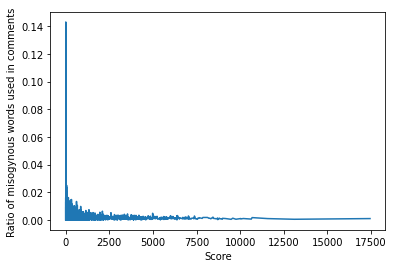

In [148]:
#Find the plots and tables
community_names = 'OffMyChest'

cols = ['Subreddit', 'Total Posts', 'Mis. Posts','Belitting','FlippingNarr','Homophobia', 'Hostility', 
                                       'Patriarchy', 'P. Violence', 'Racism', 'S. Violence', 'Stoicism']


#Uncomment to get log of mis. words used
# new_row = add_to_percentage_table(data, community_names, cols)

#Uncomment to get percentage of mis. words table
# percentage_table = pd.DataFrame(columns =cols) 
# percentage_table = percentage_table.append(new_row, ignore_index= True)
# display_perc_table(percentage_table)

#Uncomment to display table for most commonly used words
# display_most_common_words(data, mis_words_used)


#Uncomment to get date-time vs word frequency plot
# plot_graph(data)

#Uncomment to get over_18 plot
# plot_above18_graph(data)

#uncomment to get score vs negativity plot
# plot_score_negativity(data)